In [30]:
import matplotlib.pyplot as plt
import numpy as np 
from IPython.core.display import display, HTML
from arc import * 
from arc.advanced.population_lifetime import getPopulationLifetime
import arc.calculations_atom_single
import arc.alkali_atom_data
import arc.calculations_atom_pairstate
from matplotlib import pyplot as plt
import numpy as np
from arc.materials import Sapphire
from arc import DynamicPolarizability
from arc.calculations_atom_single import DynamicPolarizability
import scipy.constants as sp

In [31]:
atom=Rubidium87()

# Code to calculate density

In [40]:
#Code to calculate density
N=9112
R1=(26.06)*3.125
R2=(18.80)*3.125
AvR=(R1+R2)/(2*np.sqrt(2))
D=(N/((4/3)*sp.pi*(AvR*10**(-4))**3))
scientific_notation="{:e}".format(D)
print(scientific_notation)
AverageR =(R1+R2)/(2*np.sqrt(2))
print(AverageR)
Int_dist=(1/D)**(1/3)
print(Int_dist*10**4)

1.786620e+10
49.563765943794564
3.8252157050486972


# Code to calculate deexcitation and excitation rate starting from the slope and the tau

In [41]:
#Deexcitation
N=1 #N atoms
tau=9.7
err_tau=1.1
wIR=200
Gamma2=0.09
#err_gamma2
Vexc_dep=wIR**2*(2*np.pi)**(1.5)*AverageR
Gamma_real=(Gamma2/4.25)*10**3
print('Il tasso di deeccitazione per 300 mVpp P IR = 5.84 mW è:',Gamma_real, 'kHz')
Gamma_real1=(0.1028/3.4012)*10**3
print('Il tasso di deeccitazione per 400 mVpp P IR = 9.60 mW è:',Gamma_real1, 'kHz')
Gamma_real2=(0.058549/4.1948)*10**3
print('Il tasso di deeccitazione per 200 mVpp P IR = 2.75 mW è:',Gamma_real2, 'kHz')
#tau=
#err_tau=
#N0=
#Gamma2=1/tau
#Gamma_real=Gamma2/N0
#print('Il tasso di deeccitazione per 300 mVpp è:',Gamma_real)
#OmegaIR=np.sqrt(2*gamma*Gamma2*Vmot/(Vexc*N*0.4))/(2*np.pi)
#print('La frequenza di Rabi dell IR è:',OmegaIR)
slope=0.45
a=2.06
print('Il tasso di deeccitazione per 535 and 72.4 è:', slope/a*10**3)

Il tasso di deeccitazione per 300 mVpp P IR = 5.84 mW è: 21.176470588235293 kHz
Il tasso di deeccitazione per 400 mVpp P IR = 9.60 mW è: 30.224626602375636 kHz
Il tasso di deeccitazione per 200 mVpp P IR = 2.75 mW è: 13.957518832840659 kHz
Il tasso di deeccitazione per 535 and 72.4 è: 218.44660194174756


In [33]:
#Excitation rate starting from the slope
N=7203 #N atoms
#slope 
gamma=2*np.pi*0.7 #dephasing rate in MHz
wb=40 #blue waist in micron 
Vexc=wb**2*(2*np.pi)**(1.5)*AverageR #Excitation volume
Vmot=(4/3)*np.pi*AverageR**3 #MOT Volume
print(Vexc/10**6)
print('Per il 70 S 1/2')
Rabi_two=(np.sqrt(1.27*2*gamma*Vmot/(Vexc*N*0.4)))/(2*np.pi) #2-Photon Rabi Frequency
print('The 2-Photon Rabi Frequency calculated with the slope is:',Rabi_two*10**3, 'kHz')#Deexcitation
#Excitation
b1=1.2756
b2=0.64286
b_real1=b1*(Vmot/(Vexc*N*0.4))
print('Il tasso di eccitazione è, per Blue a 2.6 %,:', b_real1*10**3, 'kHz')
b_real2=b2*(Vmot/(Vexc*N*0.4))
print('Il tasso di eccitazione è, per Blue a 0.87 %,:', b_real2*10**3, 'kHz')
N=103000 #N atoms
R1=(46.59)*3.125
R2=(52.67)*3.125
AverageR =(R1+R2)/(2*np.sqrt(2))
Vexc=wb**2*(2*np.pi)**(1.5)*AverageR #Excitation volume
Vmot=(4/3)*np.pi*AverageR**3 #MOT Volume
AvR=(R1+R2)/(2*np.sqrt(2))
b3=
b_real3=b3*(Vmot/(Vexc*N*0.4))
print('Il tasso di eccitazione è, per Blue a 2.6 %,:', b_real3*10**3, 'kHz')

1.7169939378230568
Per il 70 S 1/2
The 2-Photon Rabi Frequency calculated with the slope is: 8.70597929077604 kHz
Il tasso di eccitazione è, per Blue a 2.6 %,: 0.3416629464020727 kHz
Il tasso di eccitazione è, per Blue a 0.87 %,: 0.17218676836315178 kHz
Il tasso di eccitazione è, per Blue a 2.6 %,: 0.006914727510882402 kHz


0.24803989134262291
0.500198722022568


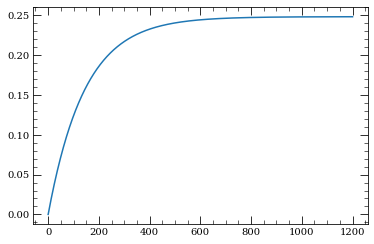

In [39]:
n=b_real3*10**3*(Vexc*N/Vmot)/(slope/a*10**3)
print(n)
print(Vexc/Vmot)
t=np.linspace(0,1200,1000)
Nat=n*(1-np.exp(-b_real3*10**3*t))
plt.plot(t, Nat)
